In [2]:
import torch

In [3]:
x = torch.Tensor([4,7])
y = torch.Tensor([7,9])

In [4]:
print(x*y)

tensor([28., 63.])


In [5]:
import torchvision

In [6]:
from torchvision import transforms, datasets

In [7]:
train = datasets.MNIST("", train=True, download=True, 
                       transform = transforms.Compose([transforms.ToTensor()]))

In [8]:
test = datasets.MNIST("", train=False, download=True, 
                       transform = transforms.Compose([transforms.ToTensor()]))

In [9]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [10]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [11]:
x, y = data[0][0], data[1][0]
print(y)

tensor(6)


In [12]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))
plt.show()

<Figure size 640x480 with 1 Axes>

In [13]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [14]:
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0 }
for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [15]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [16]:
import torch.nn as nn
import torch.nn.functional as F

In [17]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
        
        
net = Net()
print(net)
        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [18]:
X = torch.rand((28,28))
X = X.view(1,28*28)

In [19]:
X

tensor([[5.1207e-01, 7.6068e-01, 4.7782e-01, 6.1594e-01, 2.2668e-01, 4.5014e-01,
         8.0490e-01, 2.5433e-01, 8.0994e-01, 2.4771e-01, 7.7729e-01, 2.9467e-01,
         7.7241e-01, 7.8522e-01, 5.0063e-01, 8.1695e-01, 1.1868e-01, 4.9612e-01,
         8.5770e-02, 5.6577e-01, 9.0402e-01, 3.8164e-01, 2.2249e-02, 5.6523e-02,
         8.4532e-01, 9.9932e-01, 5.1726e-01, 6.4782e-01, 3.2016e-01, 6.3804e-01,
         6.7549e-01, 8.8154e-01, 5.6695e-01, 6.9265e-01, 5.7330e-01, 2.1952e-01,
         7.1960e-01, 9.3033e-01, 2.3795e-01, 7.5444e-01, 2.7251e-01, 2.7408e-01,
         2.2463e-01, 9.4722e-01, 3.6909e-02, 1.3158e-02, 6.7560e-01, 4.4194e-02,
         2.8378e-01, 8.7030e-01, 9.5233e-01, 1.0632e-01, 9.0120e-01, 4.8691e-01,
         4.1803e-01, 6.9999e-01, 7.1380e-01, 8.1327e-01, 1.8572e-01, 9.2253e-01,
         8.0062e-01, 8.2855e-01, 9.0421e-01, 9.5525e-01, 7.3421e-01, 7.4181e-01,
         9.4425e-01, 5.0361e-01, 5.5642e-02, 6.0547e-01, 5.5411e-01, 2.4411e-01,
         4.1602e-02, 8.2875e

In [20]:
output = net(X)

In [21]:
output

tensor([[-2.3995, -2.3015, -2.3681, -2.3272, -2.3561, -2.2239, -2.3084, -2.2227,
         -2.2841, -2.2507]], grad_fn=<LogSoftmaxBackward>)

In [25]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output =  net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.6508, grad_fn=<NllLossBackward>)
tensor(0.6147, grad_fn=<NllLossBackward>)
tensor(0.2176, grad_fn=<NllLossBackward>)


In [26]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy", round(correct/total, 3))

Accuracy 0.98


In [27]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [28]:
y

tensor([7, 9, 9, 9, 1, 9, 7, 1, 2, 7])

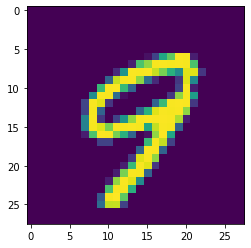

In [35]:
plt.imshow(X[3].view(28,28))
plt.show()

In [36]:
print(torch.argmax(net(X[3].view(-1, 784))[0]))

tensor(9)
